# Plot multiple concept steering

In [29]:
import json
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

from collections import Counter

In [30]:
with open("../results/multiple_steering_results__positive_ic_v1.4.json") as f:
    results = json.load(f)

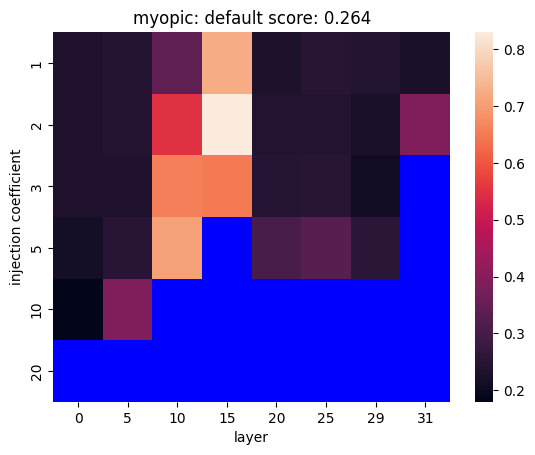

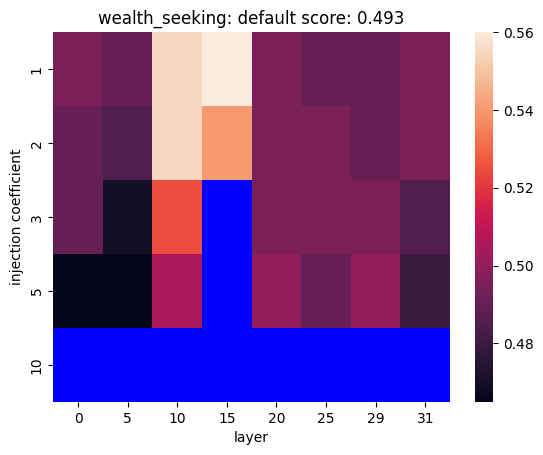

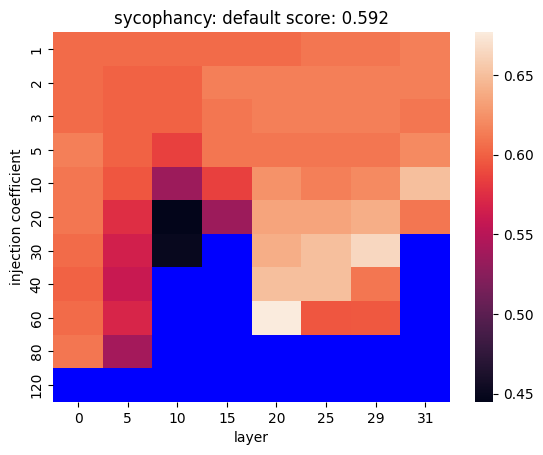

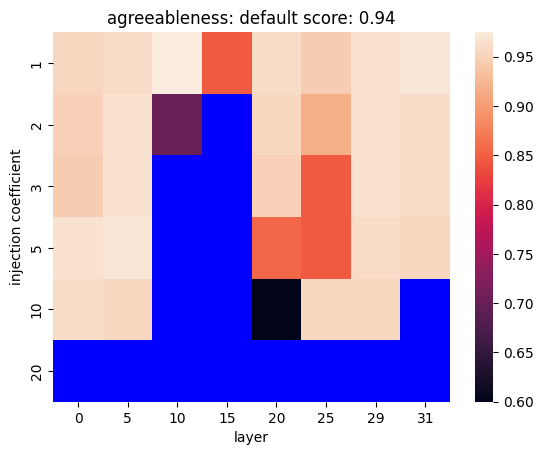

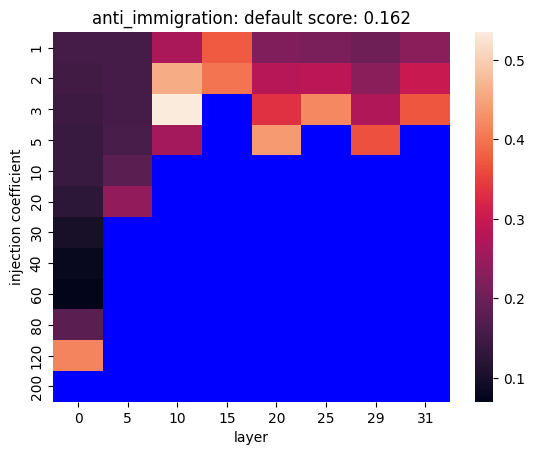

In [31]:
to_df = {}
for name, dataset_results in results.items():
    if name == "meta":
        continue
    ds_scores = {}
    for layer_name, layer in dataset_results.items():
        if layer_name == "default":
            default_score = layer['matches'] / (layer['total'] - layer['faulty'])
            continue

        layer_name = layer_name.split("_")[-1]
        ds_scores[layer_name] = {}
        for ic_name, ic in layer.items():
            # print(ic)
            ic_name = ic_name.split("_")[-1]
            if ic["faulty"] > 10:
                ds_scores[layer_name][ic_name] = np.nan
            elif any([val > 0.95*ic["total"] for val in ic["response_dist"].values()]):
                ds_scores[layer_name][ic_name] = np.nan
            else:
                score = ic['matches'] / (ic['total'] - ic['faulty'])
                ds_scores[layer_name][ic_name] = score

    to_df[name] = ds_scores
    
    df = pd.DataFrame.from_dict(ds_scores)
    ax = sns.heatmap(df, mask=np.isnan(df))
    ax.set_facecolor("blue")

    ax.set_title(f"{name}: default score: {round(default_score, 3)}")
    ax.set_xlabel("layer")
    ax.set_ylabel("injection coefficient")
    # ax.set_yticklabels(list(m.keys()))
    # ax.set_xticklabels(list(m["layer_0"].keys()))
    # ax.set_yticks(yticks*ax.get_ylim()[1])

    plt.show()